In [ ]:
## Applying ARIMA & Seasonal-ARIMA

In [ ]:
# importing dataframes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reading csv file

In [2]:
df=pd.read_csv('D:\\python\\perrin champagne.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72,Unnamed: 2
0,1964-01,2815,NaN
1,1964-02,2672,NaN
2,1964-03,2755,NaN
3,1964-04,2721,NaN
4,1964-05,2946,NaN


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72,Unnamed: 2
100,1972-05,4618,NaN
101,1972-06,5312,NaN
102,1972-07,4298,NaN
103,1972-08,1413,NaN
104,1972-09,5877,NaN


In [ ]:
# dropping unnamed columns

In [5]:
df=df.drop(['Unnamed: 2'],axis=1)

In [6]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [67]:
# Reassigning columns name

In [7]:
df.columns=['Month','Sales']

In [8]:
df

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [68]:
# converting into date time format

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413


In [ ]:
# creating index of date time columns

In [11]:
df.set_index('Month',inplace=True)

In [12]:
df

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [13]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [14]:
# visualize the data

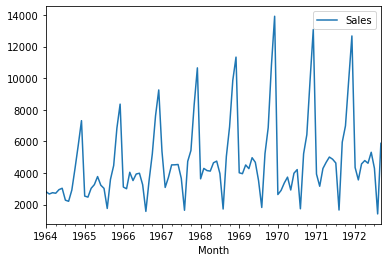

In [15]:
df.plot()

In [16]:
# seeems that data is seasonal

In [ ]:
# Applying adfuller test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# H0 : It is not stationary
# H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Stastics','P-value','#Lags Used','Number of Observation Used']
    for values,labels in zip(result,labels):
        print(labels+':'+str(values))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root stationary')
    else:
        print('Weak evidence against null hypothesis, time series has unit root, indicating it is stationary')
            

In [19]:
adfuller_test(df['Sales'])

ADF Test Stastics:-1.8335930563276197
P-value:0.3639157716602465
#Lags Used:11
Number of Observation Used:93
Weak evidence against null hypothesis, time series has unit root, indicating it is stationary


In [20]:
# taking 1 lags for data

In [21]:
df['Sales first Differnce'] = df['Sales']-df['Sales'].shift(1)

In [22]:
df

,Sales,Sales first Differnce
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0
...,...,...
1972-05-01,4618,-170.0
1972-06-01,5312,694.0
1972-07-01,4298,-1014.0


In [23]:
# As we can see that the given data is representing like seasonal so we do the differncing of data by 12 

In [24]:
df['Seasonal First Differnce'] = df['Sales']-df['Sales'].shift(12)

In [25]:
df.head(15)

,Sales,Sales first Differnce,Seasonal First Differnce
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [26]:
# let's do the adfuller test to check

In [27]:
adfuller_test(df['Seasonal First Differnce'].dropna())

ADF Test Stastics:-7.626619157213166
P-value:2.0605796968136632e-11
#Lags Used:0
Number of Observation Used:92
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root stationary


In [28]:
# plottin seasonal difference

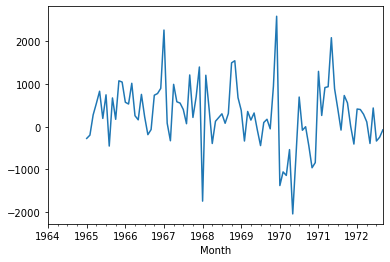

In [29]:
df['Seasonal First Differnce'].plot()

In [30]:
# plotting auto corelation and partial auto corelation

In [32]:
# identification of an AR model is often best done with pacf(q)
# identification of an MA model is often best done with ACF(p)

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

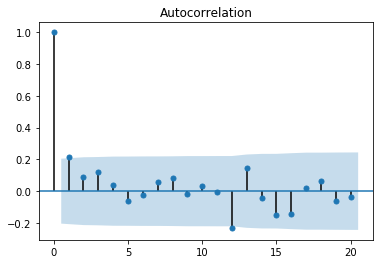

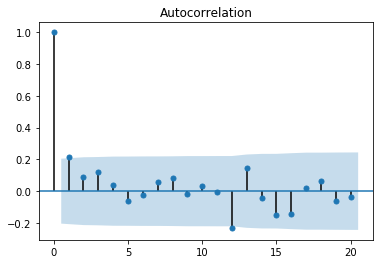

In [43]:
plot_acf(df['Seasonal First Differnce'].iloc[13:])

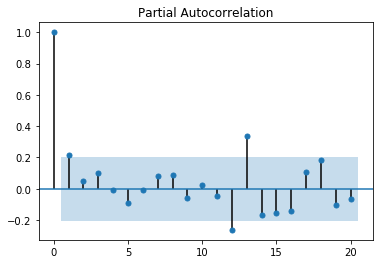

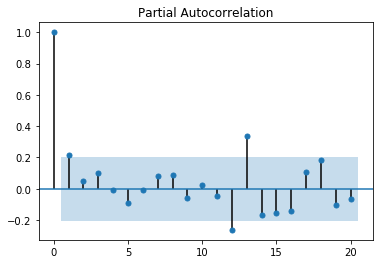

In [44]:
plot_pacf(df['Seasonal First Differnce'].iloc[13:])

In [45]:
# p=1
# d=1
# q=1

In [ ]:
# Applying ARIMA model 

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  if freq is not None:
C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  if freq is not None:


In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.263
Date:                Thu, 23 Apr 2020   AIC                           1910.251
Time:                        11:01:49   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7841     12.405      1.837      0.069      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

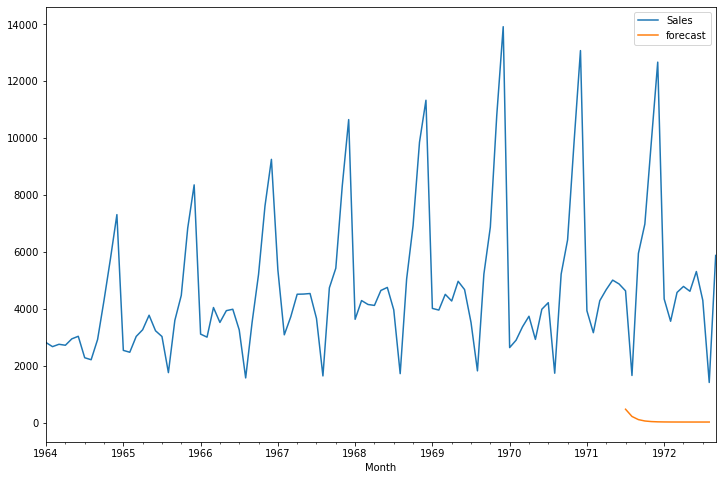

In [52]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
# forecasted values are too bad,
# So, we apply Seasonal ARIMAX model 

In [54]:
import statsmodels.api as sm

In [55]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Rageshwar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  if freq is not None:


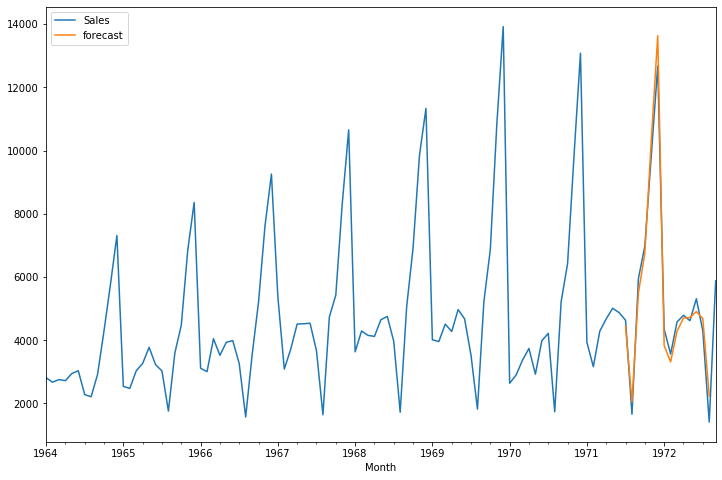

In [57]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
# And we got pretty good forecast

In [ ]:
# creating new dataset for 24 moths for forecasting the values

In [58]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [59]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [62]:
future_dates_df.head()

,Sales,Sales first Differnce,Seasonal First Differnce,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN


In [63]:
future_df=pd.concat([df,future_dates_df])

In [ ]:
# created dataframe for 24 months 

In [66]:
future_df

,Sales,Sales first Differnce,Seasonal First Differnce,forecast
1964-01-01,2815,NaN,NaN,NaN
1964-02-01,2672,-143.0,NaN,NaN
1964-03-01,2755,83.0,NaN,NaN
1964-04-01,2721,-34.0,NaN,NaN
1964-05-01,2946,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [ ]:
# predcting values for next 24 months

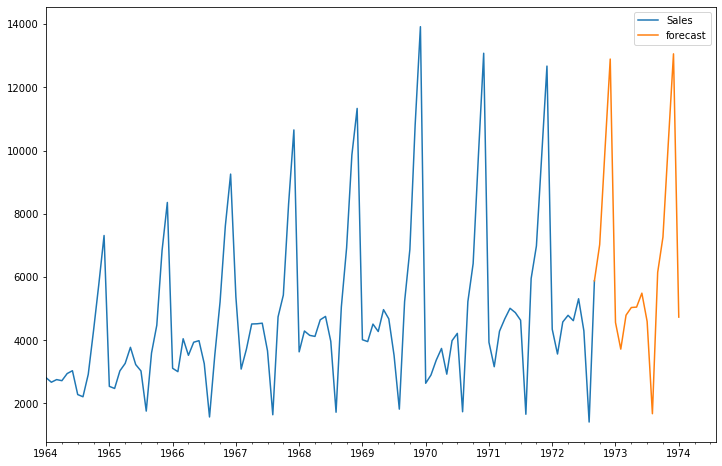

In [65]:
future_df['forecast'] = results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))